In [1]:
!pip install folium
!pip install streamlit
# !pip install --upgrade --force-reinstall numpy scipy seaborn pandas matplotlib

  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.9.3 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.0 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.3 which is incompatible.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.14.1 which is incompatible.


In [27]:
import joblib
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydeck as pdk
import folium
# from streamlit_folium import st_folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st
import warnings
import requests
import json
import joblib
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
print('Hello world')

Hello world


In [4]:
# Dados
data = {
    'Variáveis': ['N 255', 'P 255', 'K 255'],
    'Valores': [120, 180, 150],
}

df = pd.DataFrame(data)


In [10]:
#Função para criar o gráfico de radar
def plot_radar(data):
    # Preparar dados
    labels = data['Variáveis'].tolist()
    valores = data['Valores'].tolist()
    max_valores = [255] * len(labels)

    # Fechar os polígonos
    valores += valores[:1]
    max_valores += max_valores[:1]

    # Ângulos para cada variável
    angulos = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angulos += angulos[:1]

    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
    fig.patch.set_facecolor("#0D1117")
    # Traçar o triângulo maior (máximos)
    ax.plot(angulos, max_valores, color="gray", linewidth=1.5, linestyle="--", label="Máximo")

    # Traçar o triângulo menor (valores reais)
    ax.fill(angulos, valores, color="#0A7E31", alpha=0.25, label="Valores Reais")
    ax.plot(angulos, valores, color="#0A7E31", linewidth=2)

    # Estilo do gráfico
    ax.set_facecolor("#0D1117")  # Fundo branco
    #ax.set_facecolor((1, 1, 1, 0))  # Fundo transparente (sem preenchimento)
    #ax.grid(color="gray", linestyle="--", linewidth=0.5)
    ax.spines['polar'].set_visible(False)  # Remover borda externa
    ax.set_yticks([])  # Remover rótulos dos círculos

    # Adicionar rótulos das variáveis
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(labels, fontsize=12, color="white")
    plt.show()

    return fig

In [13]:
def plot_radar(data):
    import matplotlib.pyplot as plt
    import numpy as np

    # Preparar dados
    labels = data['Variáveis'].tolist()
    valores = data['Valores'].tolist()
    max_valores = [255] * len(labels)

    # Fechar os polígonos
    valores += valores[:1]
    max_valores += max_valores[:1]

    # Ângulos para cada variável
    angulos = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angulos += angulos[:1]

    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
    fig.patch.set_facecolor("#0D1117")
    ax.plot(angulos, max_valores, color="gray", linewidth=1.5, linestyle="--", label="Máximo")
    ax.fill(angulos, valores, color="#0A7E31", alpha=0.25, label="Valores Reais")
    ax.plot(angulos, valores, color="#0A7E31", linewidth=2)

    # Estilo do gráfico
    ax.set_facecolor("#0D1117")
    ax.spines['polar'].set_visible(False)
    ax.set_yticks([])

    # Adicionar rótulos das variáveis
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(labels, fontsize=12, color="white")

    # Exibir o gráfico
    plt.show()


In [14]:
# Exibir o gráfico
plot_radar(df)

In [10]:


def plot_radar(data): 
    labels = data['Variáveis'].tolist()
    valores = data['Valores'].tolist() 
    max_valores = [255] * len(labels) 
    
    # Fechar os polígonos 
    valores += valores[:1] 
    max_valores += max_valores[:1] 
    labels += labels[:1] 
    fig = go.Figure() 
    
    # Adicionar o triângulo maior (máximos) 
    fig.add_trace(go.Scatterpolar( r=max_valores, 
                                    theta=labels, 
                                    fill='toself', 
                                    name='Máximo', 
                                    line=dict(color='gray', dash='dash') 
                                    )
                    ) 
    # Adicionar o triângulo menor (valores reais) 
    fig.add_trace(go.Scatterpolar( r=valores, 
                                    theta=labels, 
                                    fill='toself', 
                                    name='Valores Reais', 
                                    line=dict(color='#0A7E31') 
                                    )
                    ) 
    fig.update_layout(polar=dict( bgcolor='#0D1117', 
                                    radialaxis=dict(visible=False), 
                                    angularaxis=dict(tickfont=dict(color='white')) 
                                    ), 
                        showlegend=False, # Remover a legenda 
                        paper_bgcolor='#0D1117', 
                        font=dict(color='white'), 
                        width=500, # Aumentar a largura da área de plotagem 
                        height=500 # Aumentar a altura da área de plotagem 
                        ) 
    return fig

In [ ]:
    # Gerar gráficos de exemplo
    # def generate_plot(data, x, y):
    #     fig, ax = plt.subplots()
    #     fig.patch.set_facecolor("#0D1117")
        
    #     sns.lineplot(data=data, x=x, y=y, ax=ax, color='green')
        
    #     ax.set_facecolor("#0D1117")
    #     # ax.set_title(title, color='white')
    #     ax.tick_params(colors='white')
    #     ax.xaxis.label.set_color('white')
    #     ax.yaxis.label.set_color('white')
        
    #     return fig

In [ ]:
def generate_plot(data, x, y):
    fig = px.line(data, x=x, y=y, title='Gráfico de Linhas', line_shape='linear') #
    fig.update_traces(line=dict(color='green'), mode='lines+markers')
    #fig.update_traces(line=dict(color='#0A7E31', mode='lines+markers'))
    fig.update_layout( plot_bgcolor='#0D1117', paper_bgcolor='#0D1117', font_color='white' ) 
    return fig

In [39]:
import geobr
import geopandas as gpd

# Baixar os limites geográficos de todos os municípios do Brasil
municipios = geobr.read_municipality(year=2020)

# Extrair o centroide (latitude e longitude) de cada município
municipios['centroid'] = municipios.geometry.centroid

# Separar latitude e longitude em colunas separadas
municipios['latitude'] = municipios['centroid'].apply(lambda point: point.y)
municipios['longitude'] = municipios['centroid'].apply(lambda point: point.x)

# Exibir as primeiras linhas com nome do município, latitude e longitude
municipios[['name_muni', 'latitude', 'longitude']].head()

,name_muni,latitude,longitude
0,Alta Floresta D'oeste,-12.470087,-62.274651
1,Ariquemes,-9.951898,-62.957182
2,Cabixi,-13.474892,-60.639847
3,Cacoal,-11.301230,-61.324713
4,Cerejeiras,-13.203512,-61.260933


In [14]:
from datetime import datetime

# Captura o momento atual
agora = datetime.now()

# Obtém a data
data = agora.date()

# Obtém o horário
horario = agora.time()

# Obtém o dia da semana (0 = segunda-feira, 6 = domingo)
dia_semana_numero = agora.weekday()

# Nome do dia da semana (em português)
dias_semana = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
dia_semana_nome = dias_semana[dia_semana_numero]

# Exibe os valores
print(f"Data: {data}")
print(f"Horário: {horario}")
print(f"Dia da semana (número): {dia_semana_numero}")
print(f"Dia da semana (nome): {dia_semana_nome}")


Data: 2024-12-14
Horário: 09:29:43.005374
Dia da semana (número): 5
Dia da semana (nome): Sábado


In [47]:
agora = datetime.now()
agora = agora.strftime('%d-%m-%Y %H:%M:%S')
agora

'14-12-2024 15:15:32'

In [38]:
def Agora():
    # Captura o momento atual
    ag = datetime.now()
    ag= ag.strftime('%H:%M:%S')
    return ag

Agora()

'20:03:09'

In [35]:
def DiadaSemana():
    
    # Captura o momento atual
    ag = datetime.now()
    
    # Obtém o dia da semana (0 = segunda-feira, 6 = domingo)
    dia_semana_numero = ag.weekday()

    # Nome do dia da semana (em português)
    dias_semana = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
    dia_semana_nome = dias_semana[dia_semana_numero]
    
    return dia_semana_nome

DiadaSemana()

'Quinta-feira'

In [37]:
def returnData():
    # Captura o momento atual
    ag = datetime.now()
    
    # Obtém a data
    data = ag.date()
    
    data = data.strftime("%d-%m-%Y")
    
    return data

returnData()

'12-12-2024'

In [ ]:
luzacity= municipios[municipios['name_muni'] == 'Luiziânia']
luzacity[['name_muni', 'latitude', 'longitude']]

latitude= luzacity['latitude']
longitude= luzacity['longitude']

In [ ]:
luzacity

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,centroid,latitude,longitude
3579,3527702.0,Luiziânia,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-50.36822 -21.622, -50.3602 -2...",POINT (-50.35087 -21.67263),-21.672627,-50.350867


In [58]:
##### Variaveis de ambiente
CIDADE= 'Luiziânia'
ESTADO= 'São Paulo'
PAIS= 'br'
LATITUDE= -21.6
LONGITUDE= -50.3
TOKEN=''

In [5]:
# Verificação da condição atual 
url=f'https://api.openweathermap.org/data/2.5/weather?lat={LATITUDE}&lon={LONGITUDE}&units=metric&appid={TOKEN}'

In [6]:
response= requests.get(url)
response

<Response [200]>

In [104]:
# Previsão para os próximos 5 dias 
url= f'https://api.openweathermap.org/data/2.5/forecast?lat={LATITUDE}&lon={LONGITUDE}&cnt={7}&units=metric&appid={TOKEN}'

In [105]:
response= requests.get(url)
response

<Response [200]>

In [106]:
response.json()

{'cod': '200',
 'message': 0,
 'cnt': 7,
 'list': [{'dt': 1734058800,
   'main': {'temp': 23.36,
    'feels_like': 23.34,
    'temp_min': 22.65,
    'temp_max': 23.36,
    'pressure': 1010,
    'sea_level': 1010,
    'grnd_level': 961,
    'humidity': 61,
    'temp_kf': 0.71},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}],
   'clouds': {'all': 40},
   'wind': {'speed': 3.52, 'deg': 121, 'gust': 9.76},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-12-13 03:00:00'},
  {'dt': 1734069600,
   'main': {'temp': 21.56,
    'feels_like': 21.65,
    'temp_min': 20.48,
    'temp_max': 21.56,
    'pressure': 1010,
    'sea_level': 1010,
    'grnd_level': 960,
    'humidity': 72,
    'temp_kf': 1.08},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 66},
   'wind': {'speed': 3.95, 'deg': 103, 'gust': 9.63},
   'visibility

In [87]:
def getWeatherNow(LATITUDE, LONGITUDE, TOKEN):
    # Verificação da condição atual 
    url=f'https://api.openweathermap.org/data/2.5/weather?lat={LATITUDE}&lon={LONGITUDE}&units=metric&appid={TOKEN}'
    response= requests.get(url)
    print(response)
    return response.json()
    

In [88]:
tempo_agora = getWeatherNow(LATITUDE, LONGITUDE, TOKEN)

<Response [200]>


In [89]:
tempo_agora

{'coord': {'lon': -50.3, 'lat': -21.6},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 23.71,
  'feels_like': 23.7,
  'temp_min': 23.71,
  'temp_max': 23.71,
  'pressure': 1009,
  'humidity': 60,
  'sea_level': 1009,
  'grnd_level': 960},
 'visibility': 10000,
 'wind': {'speed': 3.08, 'deg': 131, 'gust': 6.59},
 'clouds': {'all': 21},
 'dt': 1734046659,
 'sys': {'country': 'BR', 'sunrise': 1733992342, 'sunset': 1734040686},
 'timezone': -10800,
 'id': 3458354,
 'name': 'Luiziânia',
 'cod': 200}

In [ ]:
icon = tempo_agora['weather'][0].get('main')
condicoes= tempo_agora.get('main')
temperatura=condicoes['temp']
umidade=condicoes['humidity']

vento_vel = tempo_agora.get('wind').get('speed')

In [139]:
def getWeatherNow_information(tempo_agora):
    icon = tempo_agora['weather'][0].get('main')
    condicoes= tempo_agora.get('main')
    temperatura=condicoes['temp']
    temp_min=condicoes['temp_min']
    temp_max=condicoes['temp_max']
    umidade=condicoes['humidity']
    vento_vel = tempo_agora.get('wind').get('speed')
    
    return icon, temperatura,temp_min, temp_max, umidade, vento_vel

In [141]:
icon, temperatura,temp_min, temp_max, umidade, vento_vel= getWeatherNow_information(tempo_agora)
print(f'Icon: {icon}, Temperatura: {temperatura} ºC, Temperatura min: {temp_min} ºC,Temperatura max: {temp_max} ºC,Umidade: {umidade} %, Vento:{vento_vel} m/s')

Icon: Clouds, Temperatura: 23.71 ºC, Temperatura min: 23.71 ºC,Temperatura max: 23.71 ºC,Umidade: 60 %, Vento:3.08 m/s


* Thunderstorm - Tempestade com raios
* Drizzle - Garoa
* Rain - Chuva
* Snow - Neve
* Mist - Névoa
* Smoke - Fumaça
* Haze - Neblina seca
* Dust - Poeira
* Fog - Neblina
* Sand - Areia
* Ash - Cinzas vulcânicas
* Squall - Rajada de vento
* Tornado - Tornado
* Clear - Céu limpo
* Clouds - Nuvens

In [24]:
def get_Icon(icon):
    dict_wc = { "Thunderstorm":":lightning_cloud:", 
                "Drizzle":":partly_sunny_rain:", 
                "Rain":":rain_cloud:", 
                "Snow":"❄️", 
                "Mist":":fog:", 
                "Smoke":":fog:", 
                "Haze":":fog:", 
                "Dust":":fog:", 
                "Fog":":fog:", 
                "Sand":":fog:", 
                "Ash":":fog:", 
                "Squall":"💨", 
                "Tornado":"🌪️", 
                "Clear":"☀️", 
                "Clouds":"☁️"
    }
    
    return dict_wc.get(icon)

In [25]:
ic = get_Icon(icon)
print(ic)

☁️


In [159]:

def get_weather_description(icon):
    weather_dict = {
        "Thunderstorm": "Tempestade com raios",
        "Drizzle": "Garoa",
        "Rain": "Chuva",
        "Snow": "Neve",
        "Mist": "Névoa",
        "Smoke": "Fumaça",
        "Haze": "Neblina seca",
        "Dust": "Poeira",
        "Fog": "Neblina",
        "Sand": "Areia",
        "Ash": "Cinzas vulcânicas",
        "Squall": "Rajada de vento",
        "Tornado": "Tornado",
        "Clear": "Céu limpo",
        "Clouds": "Nublado"
    }
    
    return weather_dict.get(icon)

In [160]:
wd = get_weather_description(icon)
print(wd)

Nublado


In [ ]:
Thunderstorm - Tempestade com raios
* Drizzle - Garoa
* Rain - Chuva
* Snow - Neve
* Mist - Névoa
* Smoke - Fumaça
* Haze - Neblina seca
* Dust - Poeira
* Fog - Neblina
* Sand - Areia
* Ash - Cinzas vulcânicas
* Squall - Rajada de vento
* Tornado - Tornado
* Clear - Céu limpo
* Clouds - Nuvens

In [56]:
def getWeatherPrediction(LATITUDE, LONGITUDE, TOKEN, fh=7):
    # Previsão para os próximos 7 dias 
    url= f'https://api.openweathermap.org/data/2.5/forecast?lat={LATITUDE}&lon={LONGITUDE}&cnt={fh}&units=metric&appid={TOKEN}'
    response= requests.get(url)
    print(response)
    return response.json()
    

In [59]:
tempo_pred7 = getWeatherPrediction(LATITUDE, LONGITUDE, TOKEN, fh=63)
tempo_pred7 

<Response [200]>


{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1734210000,
   'main': {'temp': 22.18,
    'feels_like': 22.88,
    'temp_min': 22.18,
    'temp_max': 22.18,
    'pressure': 1007,
    'sea_level': 1007,
    'grnd_level': 958,
    'humidity': 93,
    'temp_kf': 0},
   'weather': [{'id': 501,
     'main': 'Rain',
     'description': 'moderate rain',
     'icon': '10d'}],
   'clouds': {'all': 100},
   'wind': {'speed': 2.73, 'deg': 241, 'gust': 3.5},
   'visibility': 702,
   'pop': 1,
   'rain': {'3h': 8.06},
   'sys': {'pod': 'd'},
   'dt_txt': '2024-12-14 21:00:00'},
  {'dt': 1734220800,
   'main': {'temp': 21.95,
    'feels_like': 22.68,
    'temp_min': 21.49,
    'temp_max': 21.95,
    'pressure': 1007,
    'sea_level': 1007,
    'grnd_level': 959,
    'humidity': 95,
    'temp_kf': 0.46},
   'weather': [{'id': 501,
     'main': 'Rain',
     'description': 'moderate rain',
     'icon': '10n'}],
   'clouds': {'all': 100},
   'wind': {'speed': 3.1, 'deg': 44, 'gust': 5.32},
 

In [61]:

def getWeatherPrediction_information(tempo_pred7_data):
    tempo_pred7_data = tempo_pred7['list']
    pred7_list = []
    data_= []
    dias_semana = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
    for data in tempo_pred7_data:
        date_text= data['dt_txt']
        if date_text.endswith('03:00:00'):
          condicoes= data.get('main')
          temp_min=condicoes['temp_min']
   
        elif date_text.endswith('15:00:00'):
            # Converter o texto para um objeto datetime
            date_object = datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S')
            data_ = date_object.date().strftime('%d/%m/%y')
            # Obter o número do dia da semana (0 = segunda-feira, 6 = domingo)
            dia_semana_numero = date_object.weekday()
            # Nome do dia da semana (em português)
            dia_semana_nome = dias_semana[dia_semana_numero]
            icon = data['weather'][0].get('main')
            condicoes= data.get('main')
            temp_max=condicoes['temp_max']
        
        pred7_list.append({dia_semana_nome:{'data':data_,
                                 'icon': icon, 
                                 'temp_min': temp_min, 
                                 'temp_max': temp_max
                                  }
                                }
                              )

    data=tempo_pred7_data[-1]       
    date_text= data['dt_txt']
    # Converter o texto para um objeto datetime
    date_object = datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S')
    # Obter o número do dia da semana (0 = segunda-feira, 6 = domingo)
    dia_semana_numero = date_object.weekday()
    data_ = date_object.date().strftime('%d/%m/%y')
    
    # Nome do dia da semana (em português)
    dia_semana_nome = dias_semana[dia_semana_numero]
    icon = data['weather'][0].get('main')
    condicoes= data.get('main')
    temp_min=condicoes['temp_min']
    temp_max=condicoes['temp_max']
    pred7_list.append({dia_semana_nome:{'data':data_,
                                 'icon': icon, 
                                 'temp_min': temp_min, 
                                 'temp_max': temp_max
                                  }
                                }
                              )
    return pred7_list

In [66]:
from datetime import datetime

def getWeatherPrediction_information(tempo_pred7):
    # Extrair os dados relevantes
    tempo_pred7_data = tempo_pred7['list']
    
    pred7_list = []
    dias_semana = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
    
    # Inicializar variáveis auxiliares
    temp_min = None
    temp_max = None
    icon = None
    
    for data in tempo_pred7_data:
        date_text = data['dt_txt']
        
        # Capturar previsão para 03:00:00
        if date_text.endswith('03:00:00'):
            condicoes = data.get('main')
            temp_min = condicoes['temp_min']
        
        # Capturar previsão para 15:00:00
        elif date_text.endswith('15:00:00'):
            condicoes = data.get('main')
            temp_max = condicoes['temp_max']
            icon = data['weather'][0].get('main')
            
            # Converter data para o formato desejado
            date_object = datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S')
            dia_semana_nome = dias_semana[date_object.weekday()]
            data_ = date_object.date().strftime('%d/%m/%y')
            
            # Adicionar ao resultado
            pred7_list.append({
                dia_semana_nome: {
                    'data': data_,
                    'icon': icon,
                    'temp_min': temp_min,
                    'temp_max': temp_max
                }
            })
    
    data=tempo_pred7_data[-1]       
    date_text= data['dt_txt']
    # Converter o texto para um objeto datetime
    date_object = datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S')
    # Obter o número do dia da semana (0 = segunda-feira, 6 = domingo)
    dia_semana_numero = date_object.weekday()
    data_ = date_object.date().strftime('%d/%m/%y')
    
    # Nome do dia da semana (em português)
    dia_semana_nome = dias_semana[dia_semana_numero]
    icon = data['weather'][0].get('main')
    condicoes= data.get('main')
    temp_max=condicoes['temp_max']
    pred7_list.append({dia_semana_nome:{'data':data_,
                                 'icon': icon, 
                                 'temp_min': temp_min, 
                                 'temp_max': temp_max
                                  }
                                }
                              )

    return pred7_list


In [67]:
pred7_dict = getWeatherPrediction_information(tempo_pred7)
print(pred7_dict)
print(len(pred7_dict))

[{'Domingo': {'data': '15/12/24', 'icon': 'Rain', 'temp_min': 21.09, 'temp_max': 24.68}}, {'Segunda-feira': {'data': '16/12/24', 'icon': 'Clouds', 'temp_min': 21.08, 'temp_max': 27.63}}, {'Terça-feira': {'data': '17/12/24', 'icon': 'Clouds', 'temp_min': 20.39, 'temp_max': 28.72}}, {'Quarta-feira': {'data': '18/12/24', 'icon': 'Clouds', 'temp_min': 21.64, 'temp_max': 28.44}}, {'Quinta-feira': {'data': '19/12/24', 'icon': 'Clouds', 'temp_min': 22.24, 'temp_max': 30.35}}, {'Quinta-feira': {'data': '19/12/24', 'icon': 'Clouds', 'temp_min': 22.24, 'temp_max': 32.39}}]
6


In [27]:
len(pred7_dict)

6

In [19]:
for k,v in pred7_dict.items():
    #print(f'{k},{v}')
    data_semana = k
    data = v.get('data')
    icon = v.get('icon')
    temp_min = v.get('temp_min')
    temp_max = v.get('temp_max')
    print(f'{data_semana}: {data}, {icon}, {temp_min}°C/{temp_max}°C')

Sábado: 14/12/24, Rain, 22.67°C/26.13°C
Domingo: 15/12/24, Rain, 24.13°C/24.13°C
Segunda-feira: 16/12/24, Clear, 28.1°C/28.1°C
Terça-feira: 17/12/24, Clear, 29.48°C/29.48°C
Quarta-feira: 18/12/24, Clear, 28.67°C/28.67°C
Quinta-feira: 19/12/24, Clouds, 24.8°C/24.8°C


In [26]:
dia_semana = list(pred7_dict[5].keys())[0]
dia_6 = dia_semana
data_6 = pred7_dict[5][dia_semana].get('data')
icon_ = pred7_dict[5][dia_semana].get('icon')
icon_6 = get_Icon(icon_)
tmin_6 = pred7_dict[5][dia_semana].get('temp_min')
tmax_6 = pred7_dict[5][dia_semana].get('temp_max')

print(f'{dia_6}: {data_6}, {icon_6}, {tmin_6}°C/{tmax_6}°C')

Quinta-feira: 19/12/24, ☁️, 24.8°C/24.8°C


In [ ]:
   # # Coordenadas da localização
    # latitude = -21.67583
    # longitude = -50.32667

    # m = folium.Map(
    #     location=[latitude, longitude], 
    #     zoom_start=10, 
    #     tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', 
    #     attr='Esri'
    # )

    # # Adicionar um marcador
    # folium.Marker(
    #     [latitude, longitude],
    #     popup="Minha localização",
    #     icon=folium.Icon(color="red", icon="info-sign"),
    # ).add_to(m)

    # # Exibir o mapa no Streamlit
    # st.title("Mapa Integrado com Folium")
    # st_folium(m, width=1200, height=500)


In [1]:
colors = ['#45A994', '#288D8A','#126171', '#033854']
#colors = ['#C5FDD3', '#94E1B4',  '#69C5A0',  '#45A994', '#288D8A','#126171', '#033854']

In [2]:
def pallete(colors):
    import matplotlib.pyplot as plt
    # Número de cores na paleta
    n_colors = len(colors)

    # Configurar o tamanho da figura
    plt.figure(figsize=(n_colors * 2, 2))

    # Plotar cada cor como um retângulo
    for i, color in enumerate(colors):
        plt.fill_between([i, i + 1], 0, 1, color=color)

    # Remover os eixos
    plt.axis('off')

    # Mostrar a paleta
    plt.show()

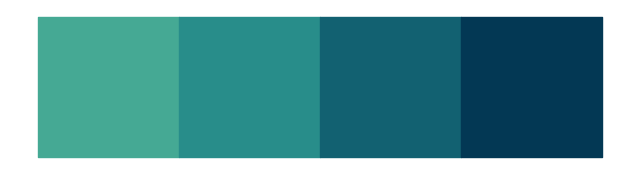

In [3]:
pallete(colors)

In [8]:
lista =[0]
lista_= [1,2,3,4,5,6,7,8,9,10]
for i in lista_:
    lista.append(i)
    print(lista)
    delta = lista[-2] - lista[-1]  
    print(delta)



[0, 1]
-1
[0, 1, 2]
-1
[0, 1, 2, 3]
-1
[0, 1, 2, 3, 4]
-1
[0, 1, 2, 3, 4, 5]
-1
[0, 1, 2, 3, 4, 5, 6]
-1
[0, 1, 2, 3, 4, 5, 6, 7]
-1
[0, 1, 2, 3, 4, 5, 6, 7, 8]
-1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
-1


In [6]:
df_irrigation = pd.read_csv('IoTProcessed_Data.csv', sep=',')
df_irrigation.head()


,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


In [7]:
df_irrigation.iloc[0]

date                       2024-02-08 06:10:00
tempreature                                 41
humidity                                    63
water_level                                100
N                                          255
P                                          255
K                                          255
Fan_actuator_OFF                           0.0
Fan_actuator_ON                            1.0
Watering_plant_pump_OFF                    1.0
Watering_plant_pump_ON                     0.0
Water_pump_actuator_OFF                    1.0
Water_pump_actuator_ON                     0.0
Name: 0, dtype: object

In [8]:
df_irrigation.columns

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [14]:
import time
from datetime import datetime

In [44]:
new_dataset= pd.DataFrame(columns=['date', 
                                   'tempreature', 
                                   'humidity', 
                                   'water_level', 
                                   'N', 
                                   'P', 
                                   'K',
                                   'Fan_actuator_ON',
                                   'Watering_plant_pump_ON', 
                                   ]
                          )

new_dataset

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_ON,Watering_plant_pump_ON


In [42]:
def simulate_sensor_data(dataset, new_dataset, i):
    # Captura o momento atual
    ag = datetime.now()
    ag= ag.strftime('%H:%M:%S')
    new_row =  {'date':ag, 
                'tempreature':dataset.iloc[i]['tempreature'], 
                'humidity':dataset.iloc[i]['humidity'], 
                'water_level':dataset.iloc[i]['water_level'], 
                'N':dataset.iloc[i]['N'], 
                'P':dataset.iloc[i]['P'], 
                'K':dataset.iloc[i]['K'],
                'Fan_actuator_ON':dataset.iloc[i]['Fan_actuator_ON'],
                'Watering_plant_pump_ON':dataset.iloc[i]['Fan_actuator_ON']
                }
    
    tempreature= dataset.iloc[i]['tempreature']
    humidity= dataset.iloc[i]['humidity']
    water_level= dataset.iloc[i]['water_level']
    N= dataset.iloc[i]['N']
    P= dataset.iloc[i]['P']
    K= dataset.iloc[i]['K']
    pump_status= dataset.iloc[i]['Watering_plant_pump_ON']
    fan_status= dataset.iloc[i]['Fan_actuator_ON']
    new_dataset=pd.concat([new_dataset, pd.DataFrame([new_row])], ignore_index=True)
    i += 1
    new_row= dataset.iloc[i, 1:-6].values.reshape(1, -1)
    return new_dataset, i, N, P, K, tempreature, humidity, water_level, pump_status, fan_status, new_row

In [ ]:
[linha, coluna]

In [26]:
df_irrigation.iloc[0, 1:-6]

tempreature     41
humidity        63
water_level    100
N              255
P              255
K              255
Name: 0, dtype: object

In [45]:
i = 0 
for i in range(10):
    new_dataset, contador, N, P, K, tempreature, humidity, water_level, pump_status, fan_status, new_row =simulate_sensor_data(df_irrigation, new_dataset, i)
    #print(new_dataset)
    
    print(tempreature)
    time.sleep(5)

41
41
41
40
39
38
38
38
37
37


In [37]:
def return_pump_prob(new_row):
    pump_model =  joblib.load('random_forest_model_irrigation.pkl')
    p = pump_model.predict(new_row)
    pump_prob= np.round(p[0],4)*100
    return pump_prob

In [48]:
def return_fan_prob(new_row):
    fan_model =  joblib.load('random_forest_model_fan.pkl')
    p = fan_model.predict(new_row)
    fan_prob= np.round(p[0],4)*100
    return fan_prob

In [50]:
i = 0 
for i in range(10):
    new_dataset, contador, N, P, K, tempreature, humidity, water_level, pump_status, fan_status, new_row =simulate_sensor_data(df_irrigation, new_dataset, i)
    pump_prob= return_pump_prob(new_row)
    fan_prob= return_fan_prob(new_row)
    print(contador)
    print(f'pump_status: {pump_status}')
    print(f'fan_status: {fan_status}')
    print(f'pump_prob: {pump_prob}')
    print(f'fan_prob: {fan_prob}')
    time.sleep(5)

1
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
2
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
3
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
4
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
5
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
6
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
7
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
8
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
9
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
10
pump_status: 0.0
fan_status: 1.0
pump_prob: 0.0
fan_prob: 100.0
